# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [ ]:
#Adding imperial units for temperature conversion
url = "http://api.openweathermap.org/data/2.5/weather?"


# Build base url
query_url = f"{url}appid={api_keys}&q="

In [41]:
# set up lists to hold reponse info
city_name=[]
lat=[]
lng=[]
temp=[]
temp_min =[]
temp_max =[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

# Loop through the list of cities and perform a request for data on each
 #include try-except statement for exclusions

for city in cities:
    weather_response = requests.get(f"{url}&q={city}&{api_keys}&units=imperial")
    weather_data = weather_response.json()
 
    try:

            response = requests.get(query_url + city).json()
            city_name.append(response['name'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            temp.append(response['main']['temp'])
            temp_min.append(response['main']['temp_min'])
            temp_max.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            print(f"The city name is: {city_name}")
            print(f"Latitude: {lat}")
            print(f"Longitude: {lng}")
            
            
          
    except:
        print('Unable to retrieve city data')
        
    continue
           
           

The city name is: ['Albany']
Latitude: [42.6]
Longitude: [-73.97]
The city name is: ['Albany', 'Yellowknife']
Latitude: [42.6, 62.46]
Longitude: [-73.97, -114.35]
The city name is: ['Albany', 'Yellowknife', 'Maningrida']
Latitude: [42.6, 62.46, -12.07]
Longitude: [-73.97, -114.35, 134.27]
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk']
Latitude: [42.6, 62.46, -12.07, -42.78]
Longitude: [-73.97, -114.35, 134.27, 147.06]
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea']
Latitude: [42.6, 62.46, -12.07, -42.78, -23.12]
Longitude: [-73.97, -114.35, 134.27, 147.06, -134.97]
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon']
Latitude: [42.6, 62.46, -12.07, -42.78, -23.12, -24.87]
Longitude: [-73.97, -114.35, 134.27, 147.06, -134.97, 113.63]
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel']
Latitude: [42.6, 62.46, -12.07, -42.78, -23.

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo']
Latitude: [42.6, 62.46, -12.07, -42.78, -23.12, -24.87, 41.37, 42.74, -38, 70.47, 34.64, 13.75, 77.48, 10.45, 69.45, -34.53, -28.24, -21.21, -20.41, 73.51, -9.8, 57.48, 65.42, 37.72]
Longitude: [-73.97, -114.35, 134.27, 147.06, -134.97, 113.63, -73.41, -84.62, -57.56, -68.59, -120.46, -13.76, -69.36, 38.2, -133.04, 20.04, -48.67, -159.78, 57.7, 80.55, -139.03, -4.22, -52.9, -25.43]
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'In

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy']
Latitude: [42.6, 62.46, -12.07, -42.78, -23.12, -24.87, 41.37, 42.74, -38, 70.47, 34.64, 13.75, 77.48, 10.45, 69.45, -34.53, -28.24, -21.21, -20.41, 73.51, -9.8, 57.48, 65.42, 37.72, 39.45, -15.95, 72.79, -4.9, 15.06, 26.59, 71.29, 30.25, 50.1, 68.75]
Longitude: [-73.97, -114.35, 134.27, 147.06, -134.97, 113.63, -73.41, -84.62, -57.56, -68.59, -120.46, -13.76, -69.36, 38.2, -133.04, 20.04, -48.67, -159.78, 57.7, 80.55, -139.03, -4.22, -52.9, -25.43, 75.98, -44.86, -56.15, 35.78, 120.72, 12.78, -156.79, 75.23, 128.05, 161.3]
The city name is: ['Alba

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai']
Latitude: [42.6, 62.46, -12.07, -42.78, -23.12, -24.87, 41.37, 42.74, -38, 70.47, 34.64, 13.75, 77.48, 10.45, 69.45, -34.53, -28.24, -21.21, -20.41, 73.51, -9.8, 57.48, 65.42, 37.72, 39.45, -15.95, 72.79, -4.9, 15.06, 26.59, 71.29, 30.25, 50.1, 68.75, -46.19, 42.9, -17.71, -20.01, -8.93, -33.87, -35.17, 7.42]
Longitude: [-73.97, -114.35, 134.27, 147.06, -134.97, 113.63, -73.41, -84.62, -57.56, -68.59, -120.46, -13.76, -69.36, 38.2, -133.04, 20.04, 

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula']
Latitude: [42.6, 62.46, -12.07, -42.78, -23.12, -24.87, 41.37, 42.74, -38, 70.47, 34.64, 13.75, 77.48, 10.45, 69.45, -34.53, -28.24, -21.21, -20.41, 73.51, -9.8, 57.48, 65.42, 37.72, 39.45, -15.95, 72.79, -4.9, 15.06, 26.59, 71.29, 30.25, 50.1, 68.75, -46.19, 42.9, -17.71, -20.01, -8.93, -33.87, -35.17, 7.42, -26.65, 47.67, 27.98, 34.38, -33.65, -22.96, 4.12]

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia']
Latitude: [42.6, 62.46, -12.07, -42.78, -23.12, -24.87, 41.37, 42.74, -38, 70.47, 34.64, 13.75, 77.48, 10.45, 69.45, -34.53, -28.24, -21.21, -20.41, 73.51, -9.8, 57.48, 65.42, 37.72, 39.45, -15.95, 72.79, -4.9, 15.06, 26.59, 71.29, 30.25, 50.1, 68.75, -46.19, 42.9, -17.71, -20.01, -8.93, -3

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini']
Latitude: [42.6, 62.46, -12.07, -42.78, -23.12, -24.87, 41.37, 42.74, -38, 70.47, 34.64, 13.75, 77.48, 10.45, 69.45, -34.53, -28.24, -21.21, -20.41, 73.51, -9.8, 57.48, 65.42, 37.72, 39.45, -15.95, 72.79, -4.9, 15.06, 26.59, 71.

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred']
Latitude: [42.6, 62.46, -12.07, -42.78, -23.12, -24.87, 41.37, 42.74, -38, 70.47, 34.64, 13.75, 77.48, 10.45, 69.45, -34.53, -28.24, -21.21, -20.41, 73.51, -9.8, 57.48, 65.42

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr']
Latitude: [42.6, 62.46, -12.07, -42.78, -23.12, -24.87, 41.37, 42.74, -38, 70.47, 34.64, 13.75, 77.48, 10.45, 69.45, -34

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki']
Latitude: [42.6, 62.46, -12.07, -42.78, -23.12, -24.87, 41.

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev']
Latitude

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', '

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', '

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', '

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', '

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', '

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

Unable to retrieve city data
The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushu

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

The city name is: ['Albany', 'Yellowknife', 'Maningrida', 'New Norfolk', 'Rikitea', 'Carnarvon', 'Bethel', 'Waverly', 'Mar del Plata', 'Clyde River', 'Lompoc', 'Tambacounda', 'Qaanaaq', 'Bichena', 'Tuktoyaktuk', 'Bredasdorp', 'Imbituba', 'Avarua', 'Mahébourg', 'Dikson', 'Atuona', 'Inverness', 'Maniitsoq', 'Vila Franca do Campo', 'Kashgar', 'São Francisco', 'Upernavik', 'Kondoa', 'Mexico', 'Ubari', 'Barrow', 'Rāmpura', 'Tambovka', 'Cherskiy', 'Mataura', 'Preobrazheniye', 'Caravelas', 'Grand Gaube', 'Airai', 'Esperance', 'Ahipara', 'Kalmunai', 'Lüderitz', 'Torbay', 'Guerrero Negro', 'Marshall', 'Busselton', 'Walvis Bay', 'Gamboula', 'Chui', 'San Patricio', 'Russell', 'Kumul', 'Miraflores', 'Valdivia', 'Matara', 'Chincha Alta', 'Lensk', 'Utete', 'Katobu', 'Vaini', 'Cidreira', 'Bluff', 'Zeya', 'Luanda', 'Port Alfred', 'Plettenberg Bay', 'Lebu', 'Virú', 'Pevek', 'Sandūr', 'Arraial do Cabo', 'Mpulungu', 'Paamiut', 'Yomou', 'Hasaki', 'Nanortalik', 'Kahului', 'Ushuaia', 'Brønderslev', 'Virovit

In [48]:
# create a data frame from cities, lat, and temp
weather_dict = {
    'City': city_name,
    'Latitude': lat,
    'Longitude':lng,
    'Temperature':temp,
    'Temperature(Minimum)':temp_min,
    'Temperature(Maximum)':temp_max,
    'Humidity': humidity,
    'Cloudy':cloudiness,
    'Wind Speed(mph)':wind_speed,
    'Country(Code)':country,
    'Date': date  
}



weather_data = pd.DataFrame.from_dict(weather_dict,orient='index')

weather_data=weather_data.transpose()


weather_data.to_csv('output_data_file', index=False, encoding='utf-8')



In [49]:
weather_data

City Latitude Longitude Temperature Temperature(Minimum)  \
0          Albany     42.6    -73.97      278.75               277.59   
1     Yellowknife    62.46   -114.35      273.15               273.15   
2      Maningrida   -12.07    134.27      304.63               304.63   
3     New Norfolk   -42.78    147.06      292.41               290.93   
4         Rikitea   -23.12   -134.97      296.53               296.53   
..            ...      ...       ...         ...                  ...   
524  Porto Walter    -8.27    -72.74      297.61               297.61   
525        Juneau     58.3   -134.42      280.77               280.15   
526         Rocha   -34.48    -54.33       283.5                283.5   
527     Lüshunkou     38.8    121.27      289.49               289.15   
528      Acajutla    13.59    -89.83      294.82               294.82   

    Temperature(Maximum) Humidity Cloudy Wind Speed(mph) Country(Code)  \
0                 279.82       57    100            1.43            US   
1                 273.15       92     90             4.6            CA   
2                 304.63       53     32            6.44            AU   
3                 293.15       32     90            1.34            AU   
4                 296.53       78     23            5.36            PF   
..                   ...      ...    ...             ...           ...   
524               297.61       64      0            0.53            BR   
525               281.48       93     90             4.1            US   
526                283.5       94     18            3.94            UY   
527               289.82       38      6               4            CN   
528               294.82      100     96            1.81            SV   

           Date  
0    1602477801  
1    1602477801  
2    1602477802  
3    1602477802  
4    1602477802  
..          ...  
524  1602478032  
525  1602478018  
526  1602478033  
527  1602478033  
528  1602478034  

[529 rows x 11 columns]

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
#  Get the indices of cities that have humidity over 100%.
 # Filtered df to exclude cities with humidity 99 % or lower
remove_cities = weather_df[weather_df['Humidity']<=99]
remove_cities.dropna(inplace=True) 
remove_cities



/Users/aleciagraham/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


City Latitude Longitude Temperature Temperature(Minimum)  \
0           Albany     42.6    -73.97      278.75               277.59   
1      Yellowknife    62.46   -114.35      273.15               273.15   
2       Maningrida   -12.07    134.27      304.63               304.63   
3      New Norfolk   -42.78    147.06      292.41               290.93   
4          Rikitea   -23.12   -134.97      296.53               296.53   
..             ...      ...       ...         ...                  ...   
523  Saint Anthony    45.02    -93.22      290.42               289.26   
524   Porto Walter    -8.27    -72.74      297.61               297.61   
525         Juneau     58.3   -134.42      280.77               280.15   
526          Rocha   -34.48    -54.33       283.5                283.5   
527      Lüshunkou     38.8    121.27      289.49               289.15   

    Temperature(Maximum) Humidity Cloudy Wind Speed(mph) Country(Code)  \
0                 279.82       57    100            1.43            US   
1                 273.15       92     90             4.6            CA   
2                 304.63       53     32            6.44            AU   
3                 293.15       32     90            1.34            AU   
4                 296.53       78     23            5.36            PF   
..                   ...      ...    ...             ...           ...   
523               291.48       88     90             3.6            US   
524               297.61       64      0            0.53            BR   
525               281.48       93     90             4.1            US   
526                283.5       94     18            3.94            UY   
527               289.82       38      6               4            CN   

           Date  
0    1602477801  
1    1602477801  
2    1602477802  
3    1602477802  
4    1602477802  
..          ...  
523  1602478032  
524  1602478032  
525  1602478018  
526  1602478033  
527  1602478033  

[507 rows x 11 columns]

In [52]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


clean_city_data = weather_df.loc[weather_df["Humidity"]>=100,:]
clean_city_data

City Latitude Longitude Temperature Temperature(Minimum)  \
8     Mar del Plata      -38    -57.56      283.05               282.15   
45         Marshall    34.38    -86.33      293.41               292.59   
132         Husavik    66.04    -17.34      275.15               275.15   
134       Ketchikan    55.34   -131.65      279.15               279.15   
143          Oxford    51.75     -1.26      279.87               279.15   
149       Haselünne    52.67      7.48       278.5               277.59   
154         Haftoni    38.76     48.76      285.15               285.15   
214            Mayo    38.89    -76.51      291.34               290.93   
234      Skellefteå    64.75     20.95      277.08               277.04   
255         Cayenne     4.93    -52.33      296.15               296.15   
262       Östersund    63.18     14.64      277.15               277.15   
263           Vardø    70.37     31.11      279.15               279.15   
318      North Bend    43.41   -124.22      289.67               289.15   
324           Kaduy     59.2     37.15      277.15               277.15   
363           Minsk     53.9     27.57      285.15               285.15   
380        Berlevåg    70.86     29.09      277.15               277.15   
385         Amboise    47.41      0.98      278.15               278.15   
405  Campbell River    50.02   -125.24      280.01               279.82   
451          Mehamn    71.04     27.85      277.15               277.15   
465    Uusikaupunki     60.8     21.41      280.15               280.15   
503       Edgewater    28.99     -80.9      296.69               296.48   
528        Acajutla    13.59    -89.83      294.82               294.82   

    Temperature(Maximum) Humidity Cloudy Wind Speed(mph) Country(Code)  \
8                 284.26      100     20             2.6            AR   
45                294.26      100     75             1.5            US   
132               275.15      100     90               1            IS   
134               279.15      100     40            1.57            US   
143               280.37      100     99             0.5            GB   
149               279.82      100     75            2.88            DE   
154               285.15      100     35            1.36            AZ   
214               292.04      100     90             3.6            US   
234               277.15      100     20               1            SE   
255               296.15      100     20             0.5            GF   
262               277.15      100    100             3.6            SE   
263               279.15      100     75             3.1            NO   
318               290.37      100     90             7.7            US   
324               277.15      100     20               1            RU   
363               285.15      100     75               3            BY   
380               277.15      100     75             4.1            NO   
385               278.15      100      0             2.1            FR   
405               280.15      100     75             3.1            CA   
451               277.15      100     75             4.1            NO   
465               280.15      100     75             2.6            FI   
503               297.15      100      1             2.1            US   
528               294.82      100     96            1.81            SV   

           Date  
8    1602477679  
45   1602477820  
132  1602477860  
134  1602477861  
143  1602477812  
149  1602477867  
154  1602477870  
214  1602477895  
234  1602477903  
255  1602477914  
262  1602477916  
263  1602477917  
318  1602477942  
324  1602477946  
363  1602477963  
380  1602477971  
385  1602477973  
405  1602477904  
451  1602478000  
465  1602478007  
503  1602478023  
528  1602478034

In [53]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv

clean_city_data.to_csv('output_data_file', index=False, encoding='utf-8')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [ ]:
weather_df

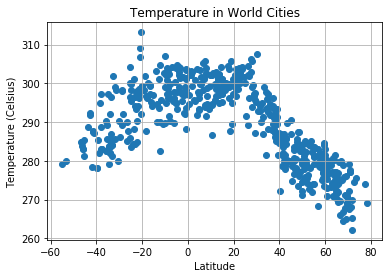

In [54]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature (F) vs. Latitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

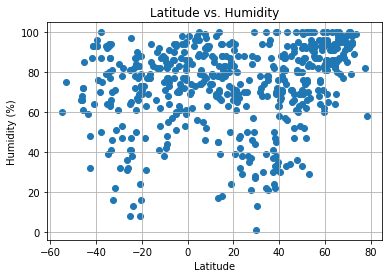

In [55]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Latitude"],weather_data["Humidity"], marker="o")

plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Humidity.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

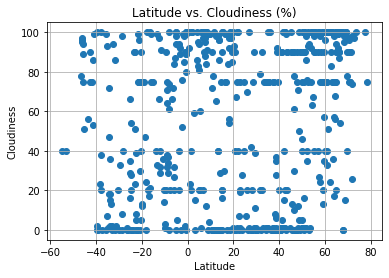

In [56]:
plt.scatter(weather_data["Latitude"],weather_data["Cloudy"], marker="o")

plt.title("Latitude vs. Cloudiness (%)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Cloudiness.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

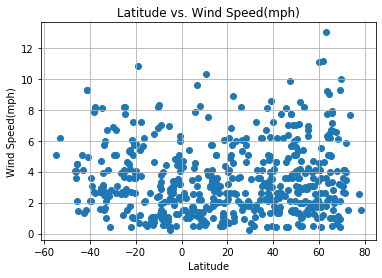

In [57]:
plt.scatter(weather_data["Latitude"],weather_data["Wind Speed(mph)"], marker="o")

plt.title("Latitude vs. Wind Speed(mph)")
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude vs. Wind Speed.png")

# Show plot
plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [63]:
# Create Northern and Southern Hemisphere DataFrames
northern_hem_df = weather_data[weather_data['Latitude']>=0]
northern_hem_df

City Latitude Longitude Temperature Temperature(Minimum)  \
0           Albany     42.6    -73.97      278.75               277.59   
1      Yellowknife    62.46   -114.35      273.15               273.15   
6           Bethel    41.37    -73.41      285.42               284.82   
7          Waverly    42.74    -84.62      284.22               284.15   
9      Clyde River    70.47    -68.59      272.15               272.15   
..             ...      ...       ...         ...                  ...   
522   Longyearbyen    78.22     15.64      269.15               269.15   
523  Saint Anthony    45.02    -93.22      290.42               289.26   
525         Juneau     58.3   -134.42      280.77               280.15   
527      Lüshunkou     38.8    121.27      289.49               289.15   
528       Acajutla    13.59    -89.83      294.82               294.82   

    Temperature(Maximum) Humidity Cloudy Wind Speed(mph) Country(Code)  \
0                 279.82       57    100            1.43            US   
1                 273.15       92     90             4.6            CA   
6                 286.15       71     90             4.6            US   
7                 284.26       81      1             2.6            US   
9                 272.15       92     90             3.6            CA   
..                   ...      ...    ...             ...           ...   
522               269.15       58     75             1.5            SJ   
523               291.48       88     90             3.6            US   
525               281.48       93     90             4.1            US   
527               289.82       38      6               4            CN   
528               294.82      100     96            1.81            SV   

           Date  
0    1602477801  
1    1602477801  
6    1602477508  
7    1602477803  
9    1602477804  
..          ...  
522  1602478032  
523  1602478032  
525  1602478018  
527  1602478033  
528  1602478034  

[358 rows x 11 columns]

In [64]:
southern_hem_df = weather_data[weather_data['Latitude']<=0]
southern_hem_df

City Latitude Longitude Temperature Temperature(Minimum)  \
2       Maningrida   -12.07    134.27      304.63               304.63   
3      New Norfolk   -42.78    147.06      292.41               290.93   
4          Rikitea   -23.12   -134.97      296.53               296.53   
5        Carnarvon   -24.87    113.63      298.15               298.15   
8    Mar del Plata      -38    -57.56      283.05               282.15   
..             ...      ...       ...         ...                  ...   
509         Moerai   -22.43   -151.33      297.86               297.86   
518   Christchurch   -43.53    172.63      288.69               288.15   
519       Pinheiro    -2.52    -45.08      295.47               295.47   
524   Porto Walter    -8.27    -72.74      297.61               297.61   
526          Rocha   -34.48    -54.33       283.5                283.5   

    Temperature(Maximum) Humidity Cloudy Wind Speed(mph) Country(Code)  \
2                 304.63       53     32            6.44            AU   
3                 293.15       32     90            1.34            AU   
4                 296.53       78     23            5.36            PF   
5                 298.15       47      0             7.7            AU   
8                 284.26      100     20             2.6            AR   
..                   ...      ...    ...             ...           ...   
509               297.86       84      8            5.29            PF   
518               289.15       59     56             5.1            NZ   
519               295.47       98     52            1.25            BR   
524               297.61       64      0            0.53            BR   
526                283.5       94     18            3.94            UY   

           Date  
2    1602477802  
3    1602477802  
4    1602477802  
5    1602477803  
8    1602477679  
..          ...  
509  1602478025  
518  1602477852  
519  1602478031  
524  1602478032  
526  1602478033  

[171 rows x 11 columns]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7927358687467132


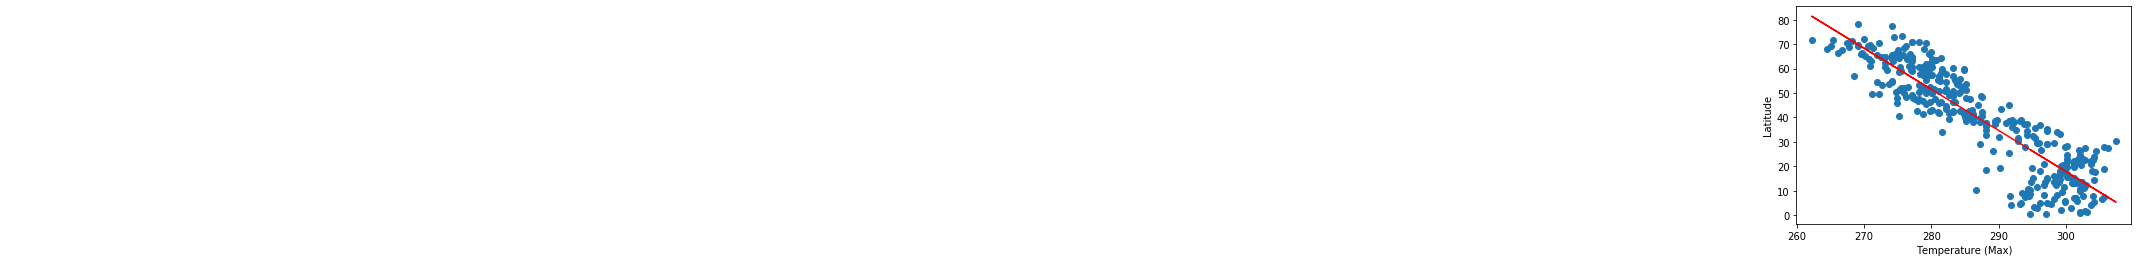

In [69]:
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

x_values = northern_hem_df ['Temperature(Maximum)'].astype('float')
y_values = northern_hem_df ['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-6,50),fontsize=20,color="red")

# Label plot
plt.xlabel('Temperature (Max)')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4056830910336883


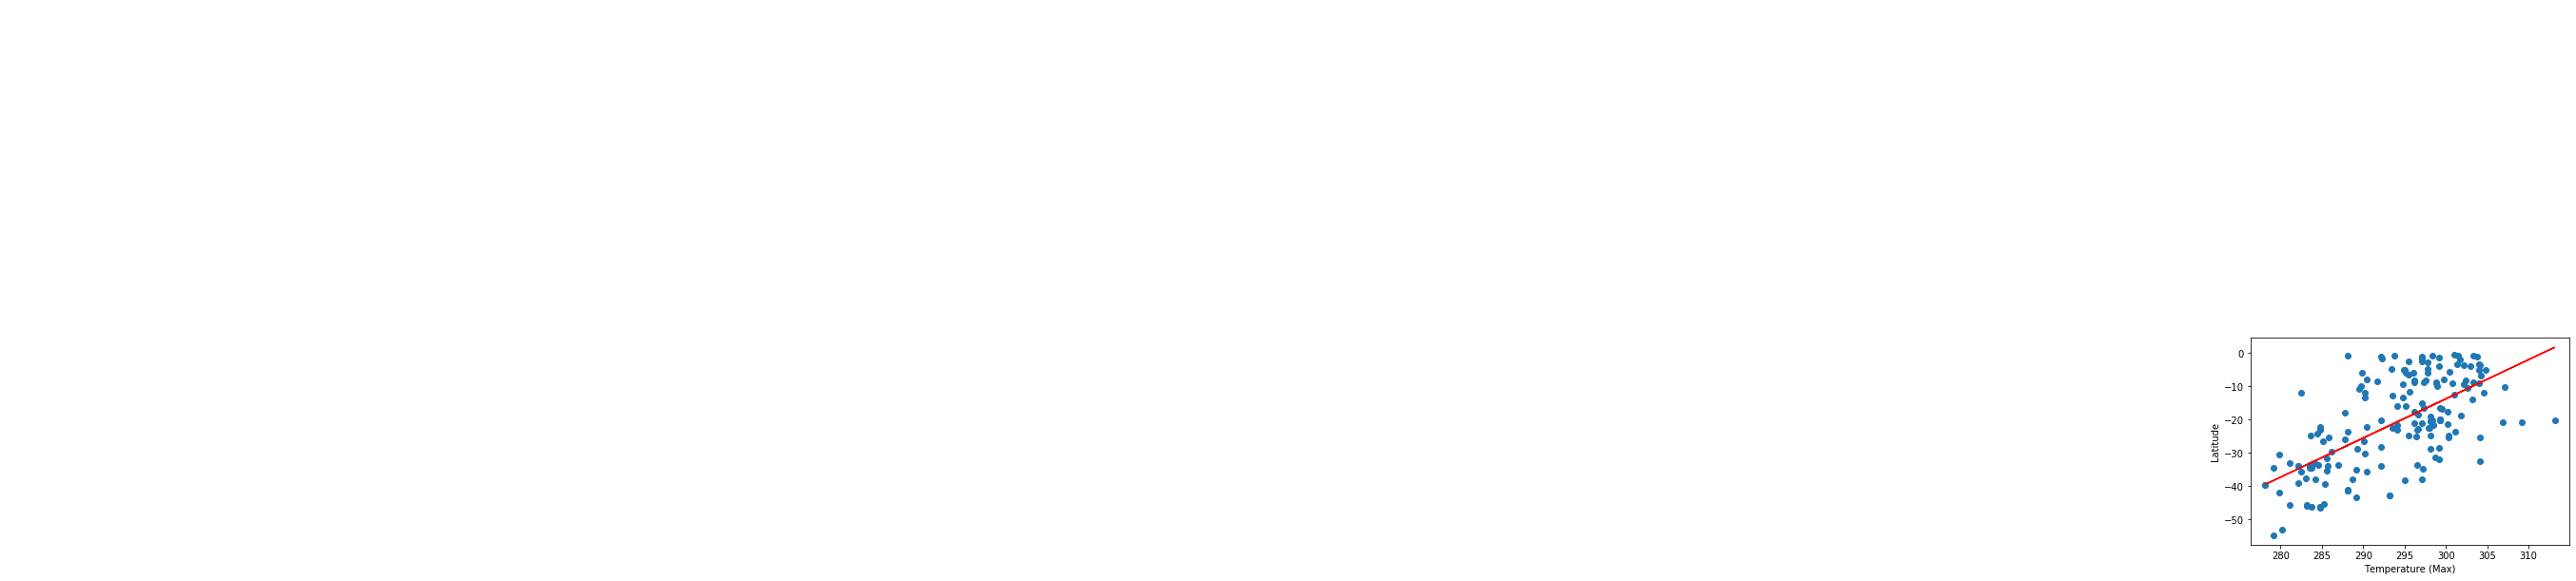

In [79]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_hem_df['Temperature(Maximum)'].astype('float')
y_values = southern_hem_df['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,100),fontsize=20,color="red")

# Label plot
plt.xlabel('Temperature (Max)')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.06411401188142521


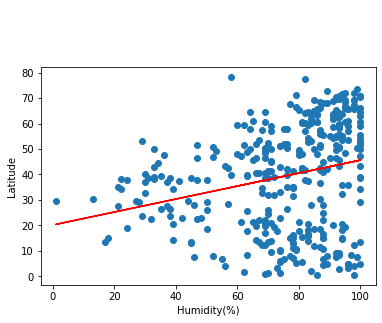

In [77]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hem_df ['Humidity'].astype('float')
y_values = northern_hem_df ['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-6,100),fontsize=20,color="red")

# Label plot
plt.xlabel('Humidity(%)')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.013922885154152057


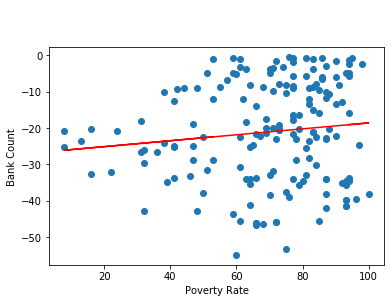

In [73]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

x_values = southern_hem_df['Humidity'].astype('float')
y_values = southern_hem_df['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Poverty Rate')
plt.ylabel('Bank Count')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.03613788309968709


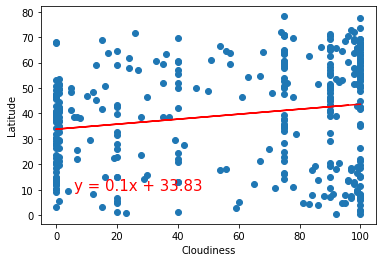

In [74]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = northern_hem_df['Cloudy'].astype('float')
y_values = northern_hem_df['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.022452197265537387


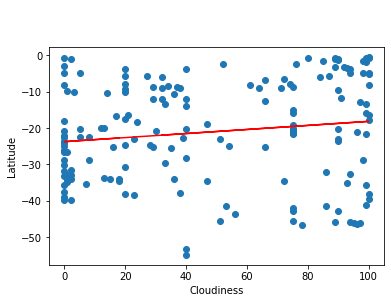

In [80]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

x_values = southern_hem_df['Cloudy'].astype('float')
y_values = southern_hem_df['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.02798627330572443


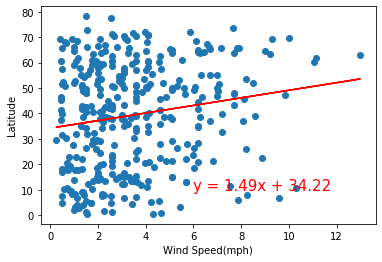

In [81]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_hem_df['Wind Speed(mph)'].astype('float')
y_values = northern_hem_df['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.049427893181639856


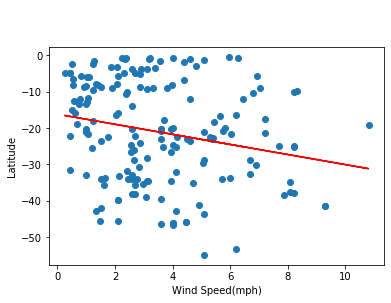

In [82]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_hem_df['Wind Speed(mph)'].astype('float')
y_values = southern_hem_df['Latitude'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Wind Speed(mph)')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()